In [1]:
print('Learning Curve')
import pandas as nd
import numpy as nu
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import learning_curve

Learning Curve


In [2]:
data=nd.read_csv('N_Airport_D_Cleaned.csv')

In [3]:
data.head()

,PC2,PC3,PC5,PC1,PC4,PC7,PC14,PC12,PC18,PC16,...,PC11,PC8,PC10,PC13,PC15,PC9,PC6,OverallSatisfaction,Selected (1),Selected (2)
0,-0.121247,-0.504180,-0.118159,1.368740,0.143006,-0.145564,0.368480,-0.229395,-0.513920,0.512028,...,0.056172,-0.288277,-0.156039,-0.224432,0.174329,0.303445,-0.566459,0.0,No,No
1,-0.244507,-0.243560,-0.110060,1.358572,0.024936,0.066499,0.405613,-0.513145,-0.390075,0.485269,...,0.068809,-0.380076,-0.097434,-0.146769,0.222456,0.342727,-0.483603,0.0,No,No
2,-0.633602,0.238418,0.050736,-0.431087,0.040130,-0.318567,0.284307,-0.601765,-0.244415,0.414669,...,-0.162691,-0.448187,-0.345003,-0.251103,0.276838,-0.599083,-0.559356,0.0,No,No
3,-0.214181,-0.575317,0.347750,-0.386271,0.506095,0.435736,0.574835,-0.048177,0.254397,-0.762151,...,-0.140789,-0.163378,-0.470379,-0.210264,-0.059871,0.106907,0.025724,0.0,No,No
4,-0.467904,-0.060014,-0.019736,1.801551,0.218367,-0.147265,0.182452,0.224616,-0.313442,0.428276,...,0.034468,-0.360626,-0.205261,-0.773617,0.231955,0.084643,-0.519577,0.0,No,No


In [4]:
data.describe()

,PC2,PC3,PC5,PC1,PC4,PC7,PC14,PC12,PC18,PC16,PC17,PC11,PC8,PC10,PC13,PC15,PC9,PC6,OverallSatisfaction
count,3.187000e+03,3.187000e+03,3.187000e+03,3.187000e+03,3.187000e+03,3.187000e+03,3.187000e+03,3.187000e+03,3.187000e+03,3.187000e+03,3.187000e+03,3.187000e+03,3.187000e+03,3.187000e+03,3.187000e+03,3.187000e+03,3.187000e+03,3.187000e+03,3187.000000
mean,-2.030525e-16,-1.794750e-16,-3.466181e-17,3.908598e-17,-1.804504e-17,-2.553478e-17,-4.121969e-17,8.136817e-17,-1.038983e-16,-6.515201e-17,8.012278e-18,-4.014848e-17,-1.231452e-16,-2.349688e-17,-1.153594e-16,1.106043e-17,2.159831e-18,9.275083e-18,0.359755
std,6.680890e-01,5.983039e-01,4.585392e-01,7.695557e-01,5.077887e-01,4.418754e-01,3.213795e-01,3.345722e-01,3.084051e-01,3.156216e-01,3.144767e-01,3.671944e-01,4.198068e-01,3.753656e-01,3.308774e-01,3.174232e-01,3.892703e-01,4.569409e-01,0.429843
min,-1.422415e+00,-1.514020e+00,-1.052797e+00,-2.246997e+00,-1.163421e+00,-1.478954e+00,-5.944943e-01,-1.023636e+00,-7.361629e-01,-8.331660e-01,-6.855266e-01,-1.030086e+00,-1.029268e+00,-1.112980e+00,-1.017847e+00,-7.597967e-01,-1.200951e+00,-1.522989e+00,0.000000
25%,-5.268848e-01,-4.155132e-01,-4.024996e-01,-4.917075e-01,-3.807125e-01,-2.874492e-01,-2.284457e-01,-2.333638e-01,-2.135042e-01,-2.141094e-01,-1.640642e-01,-2.521088e-01,-3.136636e-01,-2.541257e-01,-2.349008e-01,-2.181375e-01,-2.756794e-01,-2.994982e-01,0.000000
50%,-1.962137e-01,-1.649415e-02,4.636619e-02,-1.170937e-03,-6.019127e-02,-2.254420e-02,-4.181644e-02,-2.020023e-02,-2.712388e-02,3.875515e-02,-5.994332e-02,-5.049348e-03,-4.242300e-02,-1.421605e-02,-1.798461e-02,-5.348619e-02,3.359575e-02,-2.368607e-02,0.000000
75%,6.057527e-01,3.754665e-01,3.421931e-01,4.913834e-01,3.344138e-01,2.837381e-01,2.461188e-01,2.222888e-01,1.639852e-01,2.245348e-01,1.456831e-01,2.410491e-01,2.469850e-01,2.341733e-01,2.055415e-01,2.414927e-01,2.490406e-01,2.739999e-01,0.800000
max,1.605921e+00,2.655285e+00,1.169656e+00,2.485237e+00,1.503591e+00,1.724558e+00,8.230322e-01,1.290149e+00,9.652783e-01,8.695802e-01,9.082282e-01,1.303466e+00,1.613529e+00,1.487292e+00,1.097429e+00,8.456284e-01,1.339020e+00,1.703588e+00,1.000000


In [11]:
X=["PC2","PC3","PC5","PC1","PC4","PC7","PC14","PC12","PC18","PC16","PC17","PC11","PC8","PC10","PC13","PC15","PC9","PC6"]
y='OverallSatisfaction'
train_sizes = [1,500,1500,1900,2100,2800]
train_sizes, train_scores, test_scores = learning_curve(estimator= RandomForestRegressor(),
                                               X=data[X], y=data[y], cv=10, scoring='neg_root_mean_squared_error',
                                               # 50 different sizes of the training set
                                               train_sizes=train_sizes)

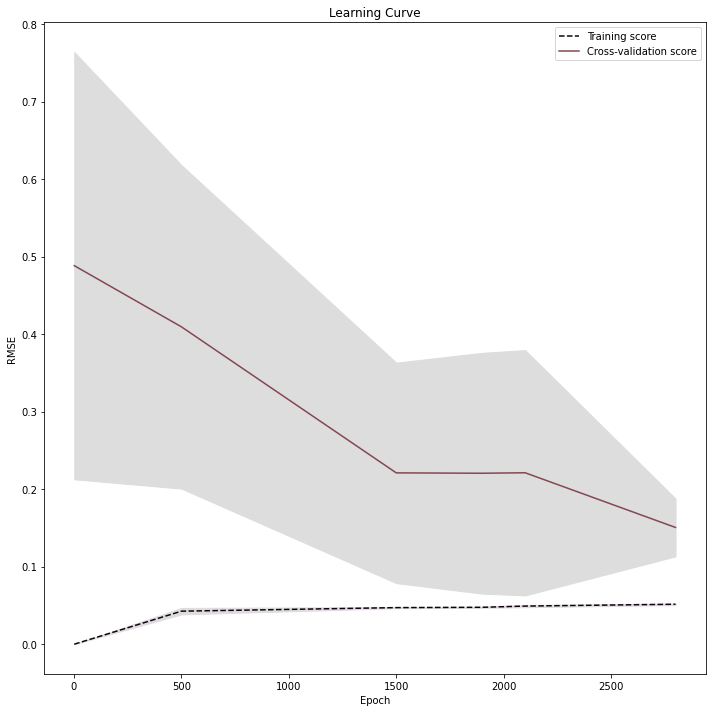

In [12]:
train_mean = -nu.mean(train_scores, axis=1)
train_std = nu.std(train_scores, axis=1)
test_mean = -nu.mean(test_scores, axis=1)
test_std = nu.std(test_scores, axis=1)
# Drawing lines
plt.subplots(1, figsize=(10,10) )
plt.plot(train_sizes, train_mean, '--', color="#110011",  label="Training score")
plt.plot(train_sizes, test_mean, color="#834651", label="Cross-validation score")

# Drawing bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Creating plot
plt.title("Learning Curve")
plt.xlabel("Epoch"), plt.ylabel("RMSE"), plt.legend(loc="best")
plt.tight_layout();
plt.show()